In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 3: Modelo Lineal

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado incluye multiples características que describen las condiciones de los pasajeros en el accidente del titanic.

- __PassengerId__: Identificador de cada pasajero.
- __Survived__: 0 si no sobrevivió al accidente, 1 si lo hizo.
- __Pclass__: Clase en la que viajaba el pasajero, 1 - Primera clase, 2 - Segunda clase y 3 - Tercera clase.
- __Name__: Nombre del pasajero.
- __Sex__: Sexo del pasajero.
- __Age__: Edad del pasajero.
- __SibSp__: Número de hermanos más número de esposas con las que viajaba el pasajero.
- __Parch__: Número de padres más número de hijos con las que viajaba el pasajero.
- __Ticket__: Número de boleto.
- __Fare__: Tarifa del boleto del pasajero.
- __Cabin__: Número de cabina del pasajero.
- __Embarked__: Puerto de embarcación, C - Cherbourg, Q - Queenstown y S - Southampton.


In [3]:
df = pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Asignación 1 &#x1F625;

Realice el preprocesamiento que considere adecuado para que las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__, __Embarked__ y __Survived__ puedan ser utilizadas por un modelo lineal.

In [4]:
# Obtenemos los atributos deseados
new_df = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]

In [5]:
# Utilizamos un One Hot Encoder para los atributos 'Sex', 'Embarked'
ohe_sex = pd.get_dummies(new_df['Sex'], prefix = 'Sex')
ohe_embarked = pd.get_dummies(new_df['Embarked'], prefix = 'Embarked')
new_df = new_df.drop('Sex', axis = 1)
new_df = new_df.join(ohe_sex)
new_df = new_df.drop('Embarked', axis = 1)
new_df = new_df.join(ohe_embarked)

In [6]:
# Observamos las transformaciones en los atributos
new_df.dtypes

Pclass          int64
SibSp           int64
Parch           int64
Fare          float64
Survived        int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [7]:
# Imprimimos los primeros 10 registros
new_df.head(10)

,Pclass,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.2500,0,0,1,0,0,1
1,1,1,0,71.2833,1,1,0,1,0,0
2,3,0,0,7.9250,1,1,0,0,0,1
3,1,1,0,53.1000,1,1,0,0,0,1
4,3,0,0,8.0500,0,0,1,0,0,1
5,3,0,0,8.4583,0,0,1,0,1,0
6,1,0,0,51.8625,0,0,1,0,0,1
7,3,3,1,21.0750,0,0,1,0,0,1
8,3,0,2,11.1333,1,1,0,0,0,1
9,2,1,0,30.0708,1,1,0,1,0,0


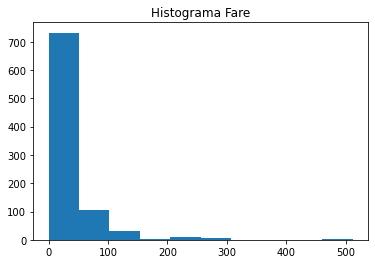

In [8]:
# Imprimimos el histograma de la columna 'Fare'
plt.hist(df['Fare'])
plt.title('Histograma Fare')
plt.show()

In [9]:
def calc_skewness(x) -> float:
    """
    Descripción:
    Esta funcion calcula el skewness de un atributo.
    
    Entradas:
    - x: Los samples de un atributo dado. 
            
    Salidas:
    - El cálculo de skewness.
    """
    return (((x-x.mean()) / x.var()**(1/2)) ** 3).mean()

In [10]:
# Obtenemos skewness de la columna 'Fare'
calc_skewness(new_df['Fare'])

4.771209669373592

In [11]:
# Realizamos una transformación a la columna 'Fare'
new_df['Fare'] = new_df['Fare'] ** (1 / 2)

In [12]:
# Obtenemos el nuevo skewness
calc_skewness(new_df['Fare'])

2.0779894539935846

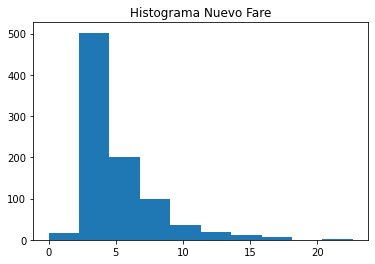

In [13]:
# Imprimimos el nuevo histograma
plt.hist(new_df['Fare'])
plt.title('Histograma Nuevo Fare')
plt.show()

## Asignación 2 &#x1F625;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__ y __Embarked__, entrene un clasificador lineal para predecir __Survived__ utilizando el algoritmo _pocket_. Imprima el error obtenido.

In [14]:
# Obtenemos X
X = new_df.drop('Survived', axis = 1).to_numpy()
# Obtenemos y
y = new_df['Survived'].to_numpy()

In [15]:
class PocketLinearClassifier:
    
    def __init__(self, learning_rate = 0.1, max_iterations = 100):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        
    def fit(self, X, y):
        # Agregamos una columna con valor uno a la matriz X
        X = np.insert(X, 0, 1, axis = 1)
        # Inicializamos un vector de ceros
        w = np.zeros(X.shape[1])
        # Inicializamos el mejor vecotr de pesos y le menor error de clasificación
        best_w = np.copy(w)
        best_error = len(X)
        # Iteramos el máximos nuemero de iteraciones
        for i in range(self.max_iterations):
            # Calculamos las clasificaciones predichas
            y_pred = np.sign(np.dot(X, w))
            y_pred[y_pred == -1] = 0
            # Calculamos el error de clasificación
            error = len(X) - np.sum(y == y_pred)
            if error < best_error:
                best_w = np.copy(w)
                best_error = error
            # Si no hay errore, terminamos el entrenamiento
            if error == 0:
                break
            # Calculamos el gradiente
            gradiente = -np.dot((y - y_pred), X)
            # Actualizamos el vector de pesos con el gradiente y el factor de aprendizaje
            w = w - self.learning_rate * gradiente
        self.coef_ = best_w
        return self
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis = 1)
        # Calculamos las clasifiaciones 
        y_pred = np.sign(np.dot(X, self.coef_))
        y_pred[y_pred == -1 ] = 0
        y_pred[y_pred == 1] = 1
        return y_pred

In [16]:
# Generamos nuestro objeto para entrenar
plr = PocketLinearClassifier()

In [17]:
# Entrenamos el clasificador
plr.fit(X, y)

In [18]:
# Predeicmos
y_pred = plr.predict(X)

In [20]:
# Generamos las tablas
from tabulate import tabulate
table = [[y[i], y_pred[i]] for i in range(len(y))]
headers =  ['y', 'y_pred']
print(tabulate(table, headers, tablefmt = "github"))

|   y |   y_pred |
|-----|----------|
|   0 |        0 |
|   1 |        1 |
|   1 |        0 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        0 |
|   1 |        1 |
|   1 |        0 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        1 |
|   0 |        0 |
|   1 |        0 |
|   0 |        0 |
|   1 |        1 |
|   0 |        0 |
|   1 |        0 |
|   1 |        1 |
|   1 |        0 |
|   0 |        0 |
|   1 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   1 |        1 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        0 |
|   0 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        1 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   0 |     

## Asignación 3 &#x1F625;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Cabin__ y __Embarked__, entrene una regresión lineal para predecir __Fare__ utilizando el algoritmo de Ordinary Leasts Squares (OLS). Imprima el valor del error cuadrático medio (MSE).

## Asignación 4 &#x1F921;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__ y __Embarked__, entrene un clasificador lineal para predecir la probabilidad de supervivencia __Survived__ utilizando el algoritmo de gradiente descendente estocástico y la entropía cruzada como función de error. Imprima el arror en cada iteración del gradiente.